Feature engineering for Italian Sign Language (LIS)

For Word = Cane (Dog in Italian)

In [1]:
word="cane"
number=0
import pandas as pd

Getting Video from Youtube

In [2]:
!pip install youtube_dl

     |████████████████████████████████| 1.9MB 3.0MB/s 


In [3]:
import youtube_dl

In [4]:
!youtube-dl ytsearch:"https://www.youtube.com/watch?v=mXdaIzIVuBY"

[download] Downloading playlist: https://www.youtube.com/watch?v=mXdaIzIVuBY
[youtube:search] query "https://www.youtube.com/watch?v=mXdaIzIVuBY": Downloading page 1
[youtube:search] playlist https://www.youtube.com/watch?v=mXdaIzIVuBY: Downloading 1 videos
[download] Downloading video 1 of 1
[youtube] mXdaIzIVuBY: Downloading webpage
[download] Destination: Corso LIS 'Lingua dei Segni italiana' - Impariamo qualche segno-mXdaIzIVuBY.f137.mp4
[download] 100% of 15.93MiB in 00:03
[download] Destination: Corso LIS 'Lingua dei Segni italiana' - Impariamo qualche segno-mXdaIzIVuBY.f251.webm
[download] 100% of 1.80MiB in 00:00
[ffmpeg] Merging formats into "Corso LIS 'Lingua dei Segni italiana' - Impariamo qualche segno-mXdaIzIVuBY.mkv"
Deleting original file Corso LIS 'Lingua dei Segni italiana' - Impariamo qualche segno-mXdaIzIVuBY.f137.mp4 (pass -k to keep)
Deleting original file Corso LIS 'Lingua dei Segni italiana' - Impariamo qualche segno-mXdaIzIVuBY.f251.webm (pass -k to keep)
[downl

In [5]:
import cv2
import PIL

In [6]:
import numpy as np

cap = cv2.VideoCapture("/content/Corso LIS 'Lingua dei Segni italiana' - Impariamo qualche segno-mXdaIzIVuBY.mkv")
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


In [7]:
!mkdir frames
import cv2 as cv


In [8]:
import cv2 as cv
success,image = cap.read()
count = 0
while success:
  cv2.imwrite("/content/frames/frames%d.jpg" % count, image)     
  success,image = cap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [9]:
  from google.colab.patches import cv2_imshow

In [10]:
import os    
from os.path import isfile

zx1 = ["/content/frames/frames{}.jpg".format(i) for i in range(1580, 1623)]
zx = [f for f in zx1 if isfile(f)]
zx


['/content/frames/frames1580.jpg',
 '/content/frames/frames1581.jpg',
 '/content/frames/frames1582.jpg',
 '/content/frames/frames1583.jpg',
 '/content/frames/frames1584.jpg',
 '/content/frames/frames1585.jpg',
 '/content/frames/frames1586.jpg',
 '/content/frames/frames1587.jpg',
 '/content/frames/frames1588.jpg',
 '/content/frames/frames1589.jpg',
 '/content/frames/frames1590.jpg',
 '/content/frames/frames1591.jpg',
 '/content/frames/frames1592.jpg',
 '/content/frames/frames1593.jpg',
 '/content/frames/frames1594.jpg',
 '/content/frames/frames1595.jpg',
 '/content/frames/frames1596.jpg',
 '/content/frames/frames1597.jpg',
 '/content/frames/frames1598.jpg',
 '/content/frames/frames1599.jpg',
 '/content/frames/frames1600.jpg',
 '/content/frames/frames1601.jpg',
 '/content/frames/frames1602.jpg',
 '/content/frames/frames1603.jpg',
 '/content/frames/frames1604.jpg',
 '/content/frames/frames1605.jpg',
 '/content/frames/frames1606.jpg',
 '/content/frames/frames1607.jpg',
 '/content/frames/fr

In [11]:
!mkdir zx
from skimage import measure
from skimage import io
import skimage

Extracting Features from each Frame

Convex Hull

Central Moments

Extreme points of fitted line

In [12]:

k=0

In [13]:
for i in zx:
   img = cv2.imread(i)
   hsvim = cv.cvtColor(img, cv.COLOR_BGR2HSV)
   lower = np.array([0, 48, 80], dtype = "uint8")
   upper = np.array([20, 255, 255], dtype = "uint8")
   skinRegionHSV = cv.inRange(hsvim, lower, upper)
   blurred = cv.blur(skinRegionHSV, (2,2))
   ret,thresh = cv.threshold(blurred,0,255,cv.THRESH_BINARY)
   contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
   contours = max(contours, key=lambda x: cv.contourArea(x))
   cv.drawContours(img, [contours], -1, (255,255,0), 2)
   cv2.imwrite('/content/zx/%5d.jpg' %k ,img)
   k +=1

In [14]:
def x(i):
   img = cv2.imread(i)
   hsvim = cv.cvtColor(img, cv.COLOR_BGR2HSV)
   lower = np.array([0, 48, 80], dtype = "uint8")
   upper = np.array([20, 255, 255], dtype = "uint8")
   skinRegionHSV = cv.inRange(hsvim, lower, upper)
   blurred = cv.blur(skinRegionHSV, (2,2))
   ret,thresh = cv.threshold(blurred,0,255,cv.THRESH_BINARY)
   contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
   contours = max(contours, key=lambda x: cv.contourArea(x))
   central_moments=skimage.measure.moments_central(contours)
   enclosing_circle=cv2.minEnclosingCircle(contours)
   return enclosing_circle


def y(i):
   img = cv2.imread(i)
   hsvim = cv.cvtColor(img, cv.COLOR_BGR2HSV)
   lower = np.array([0, 48, 80], dtype = "uint8")
   upper = np.array([20, 255, 255], dtype = "uint8")
   skinRegionHSV = cv.inRange(hsvim, lower, upper)
   blurred = cv.blur(skinRegionHSV, (2,2))
   ret,thresh = cv.threshold(blurred,0,255,cv.THRESH_BINARY)
   contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
   contours = max(contours, key=lambda x: cv.contourArea(x))
   central_moments=skimage.measure.moments_central(contours)
   enclosing_circle=cv2.minEnclosingCircle(contours)
   return central_moments

def z(i):
   img = cv2.imread(i)
   hsvim = cv.cvtColor(img, cv.COLOR_BGR2HSV)
   lower = np.array([0, 48, 80], dtype = "uint8")
   upper = np.array([20, 255, 255], dtype = "uint8")
   skinRegionHSV = cv.inRange(hsvim, lower, upper)
   blurred = cv.blur(skinRegionHSV, (2,2))
   ret,thresh = cv.threshold(blurred,0,255,cv.THRESH_BINARY)
   contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
   convex_hull=cv2.convexHull(contours[0]) 
   return convex_hull

def zz(i):
   img = cv2.imread(i)
   hsvim = cv.cvtColor(img, cv.COLOR_BGR2HSV)
   lower = np.array([0, 48, 80], dtype = "uint8")
   upper = np.array([20, 255, 255], dtype = "uint8")
   skinRegionHSV = cv.inRange(hsvim, lower, upper)
   blurred = cv.blur(skinRegionHSV, (2,2))
   ret,thresh = cv.threshold(blurred,0,255,cv.THRESH_BINARY)
   contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
   rows,cols = img.shape[:2]
   [vx,vy,x,y] = cv2.fitLine(contours[0], cv2.DIST_L2,0,0.01,0.01)
   leftline= int((-x*vy/vx) + y)
   rightline = int(((cols-x)*vy/vx)+y)
   return leftline

def zzz(i):
   img = cv2.imread(i)
   hsvim = cv.cvtColor(img, cv.COLOR_BGR2HSV)
   lower = np.array([0, 48, 80], dtype = "uint8")
   upper = np.array([20, 255, 255], dtype = "uint8")
   skinRegionHSV = cv.inRange(hsvim, lower, upper)
   blurred = cv.blur(skinRegionHSV, (2,2))
   ret,thresh = cv.threshold(blurred,0,255,cv.THRESH_BINARY)
   contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
   rows,cols = img.shape[:2]
   [vx,vy,x,y] = cv2.fitLine(contours[0], cv2.DIST_L2,0,0.01,0.01)
   leftline= int((-x*vy/vx) + y)
   rightline = int(((cols-x)*vy/vx)+y)
   return rightline



In [15]:
enclosing_circle=[]
central_moments=[]
convex_hull=[]
leftline=[]
rightline=[]
for i in zx:
 enclosing_circle.append(x(i))
 central_moments.append(y(i))
 convex_hull.append(z(i))
 leftline.append(zz(i))
 rightline.append(zzz(i))


In [16]:
central_moments12 = np.array([features_2d.flatten() for features_2d in central_moments])

In [17]:
central_moments12[0]

array([ 1.10439800e+06,  2.00111039e-11,  2.36183074e+05,  8.98031947e+04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.14321369e-09, -4.20252922e+05, -1.59791531e+05, -1.50631028e+05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.99796033e+10, -3.49102036e+08,  4.14003691e+09,  1.49949619e+09,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.81591357e+11, -4.79183908e+09, -4.06565418e+10, -1.64834848e+10,
        0.00000000e+00,  

In [18]:
from sklearn.manifold import MDS

import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [19]:
import numpy as np
from sklearn.decomposition import PCA
convex1dseq=[]
for i in range(len(convex_hull)):
 pca = PCA(n_components=1)
 pca.fit(convex_hull[i].reshape(-1,1))
 xx= pca.transform(convex_hull[0].reshape(-1,1))
 convex1dseq.append(xx)

In [20]:
mat=np.hstack(convex1dseq).T

In [21]:
mat

array([[ 693.20512821, -453.79487179,  692.20512821, ..., -469.79487179,
         693.20512821, -462.79487179],
       [ 681.17567568, -465.82432432,  680.17567568, ..., -481.82432432,
         681.17567568, -474.82432432],
       [ 691.86904762, -455.13095238,  690.86904762, ..., -471.13095238,
         691.86904762, -464.13095238],
       ...,
       [ 705.41666667, -441.58333333,  704.41666667, ..., -457.58333333,
         705.41666667, -450.58333333],
       [ 701.64864865, -445.35135135,  700.64864865, ..., -461.35135135,
         701.64864865, -454.35135135],
       [ 713.05      , -433.95      ,  712.05      , ..., -449.95      ,
         713.05      , -442.95      ]])

In [22]:
convexlabel=range(len(convex1dseq))

In [23]:
from sklearn.decomposition import  TruncatedSVD
svd = TruncatedSVD(algorithm="randomized",n_components=1)
svd.fit(mat,convexlabel)
 


TruncatedSVD(algorithm='randomized', n_components=1, n_iter=5,
             random_state=None, tol=0.0)

In [24]:
x=svd.transform(mat)

SVD COMPONENT

In [25]:
x

array([[4228.79866993],
       [4239.19291201],
       [4229.95313186],
       [4229.94284536],
       [4188.58082426],
       [4188.58082426],
       [4233.29624474],
       [4247.55333532],
       [4247.55333532],
       [4233.29624474],
       [4336.55214322],
       [4336.76815975],
       [4336.76815975],
       [4337.41620932],
       [4279.86240138],
       [4278.25103487],
       [4338.28027542],
       [4274.21094204],
       [4274.18758891],
       [4272.30766132],
       [4273.63040699],
       [4273.61932922],
       [4270.01905382],
       [4270.58309697],
       [4272.36437608],
       [4340.44044066],
       [4271.73664862],
       [4278.61300851],
       [4271.19838728],
       [4267.96689684],
       [4269.79719901],
       [4341.52052328],
       [4274.82980019],
       [4273.21382452],
       [4272.335231  ],
       [4278.31168816],
       [4280.28814704],
       [4270.82311533],
       [4272.79807721],
       [4273.77534116],
       [4218.24709356],
       [4221.502

In [26]:
len(x)

43

Going back reversing SVD

In [27]:
SVDinverse=svd.inverse_transform(x)
SVDinverse

array([[ 639.7241591 , -496.29684192,  638.73373103, ..., -512.1436911 ,
         639.7241591 , -505.21069459],
       [ 641.29657914, -497.51672253,  640.30371663, ..., -513.40252273,
         641.29657914, -506.45248514],
       [ 639.89880378, -496.43233094,  638.90810532, ..., -512.28350632,
         639.89880378, -505.34861709],
       ...,
       [ 638.12793784, -495.05849637,  637.13998106, ..., -510.86580495,
         638.12793784, -503.95010744],
       [ 638.62047124, -495.44060288,  637.6317519 , ..., -511.26011219,
         638.62047124, -504.33907687],
       [ 637.13015293, -494.28441664,  636.14374092, ..., -510.06700871,
         637.13015293, -503.16212468]])

In [28]:
SVDinverse.reshape(78,43)


array([[ 639.7241591 , -496.29684192,  638.73373103, ...,  215.82094337,
        -520.0671157 ,  217.80179952],
       [-524.02882799,  219.78265567, -527.00011222, ..., -484.60950987,
         635.33940407, -479.64519731],
       [ 617.46787884, -458.79508455,  611.51070377, ...,  225.28718646,
        -534.25263549,  231.24436154],
       ...,
       [-477.6436549 ,  211.4937197 , -480.60981289, ..., -534.98937617,
         628.73327791, -529.05706017],
       [ 631.69943591, -525.10218284,  635.65431324, ...,  210.01375483,
        -501.18930067,  211.00016683],
       [-506.12136069,  211.98657884, -510.06700871, ..., -510.06700871,
         637.13015293, -503.16212468]])

Multi Dimensional Scaling for Central Moments

Flatenning Data (Central Moments)

In [29]:
central_moments12 = np.array([features_2d.flatten() for features_2d in central_moments])

In [30]:
mds = MDS(2,random_state=0)
flatcentral_moments = mds.fit_transform(central_moments12)
flatcentral_moments

array([[-2.24786328e+11,  7.21518361e+10],
       [-3.49180934e+11,  7.66652477e+10],
       [-2.35690723e+11,  3.48886006e+10],
       [-2.42302005e+11,  3.99158724e+10],
       [-7.30416815e+10, -6.84039425e+10],
       [-7.66302969e+10, -6.67711843e+10],
       [-3.25989593e+11,  1.47934887e+11],
       [-3.23043950e+11,  1.47952361e+11],
       [ 1.02377055e+11,  7.39113223e+10],
       [ 1.07957224e+11,  6.62886237e+10],
       [ 5.31935207e+11, -3.56714518e+11],
       [ 4.67539334e+11,  3.67923231e+10],
       [ 3.61712388e+11, -3.31651465e+10],
       [ 9.28503993e+10, -8.55881280e+08],
       [-5.18934871e+10,  4.50546994e+10],
       [-4.86255661e+10,  2.38683760e+10],
       [-4.93353286e+10,  5.12028937e+10],
       [ 2.53159305e+10,  2.15651993e+10],
       [ 1.85680577e+10,  2.38158242e+10],
       [ 7.22948732e+10, -6.46227817e+10],
       [ 9.92098674e+10,  2.04427958e+10],
       [ 9.34341488e+10,  2.55190013e+10],
       [ 2.04691086e+10,  1.88508487e+10],
       [-3.

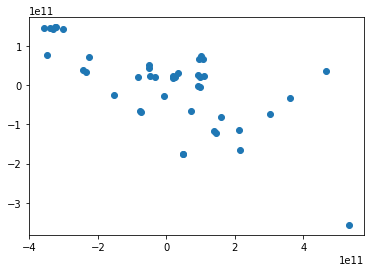

In [31]:
x = [row[0] for row in flatcentral_moments]
y = [row[1] for row in flatcentral_moments]
plt.scatter(x,y)


Left and right points of fitted line for each frame

In [32]:
np.asarray([leftline,rightline]).T

array([[ 770,  739],
       [ 712,  744],
       [ 624,  744],
       [ 621,  745],
       [-199,  760],
       [-199,  760],
       [ 776,  776],
       [ 785,  785],
       [ 785,  785],
       [2380,  460],
       [ 772,  772],
       [1696,  736],
       [1696,  736],
       [ 774,  774],
       [ 835,  732],
       [ 841,  732],
       [ 775,  775],
       [ 898,  725],
       [ 906,  724],
       [ 844,  734],
       [ 844,  728],
       [ 841,  729],
       [ 837,  730],
       [ 855,  728],
       [ 862,  729],
       [ 772,  772],
       [ 869,  727],
       [ 878,  726],
       [ 842,  730],
       [ 855,  728],
       [ 843,  729],
       [1700,  740],
       [ 827,  731],
       [ 834,  731],
       [ 903,  723],
       [ 900,  725],
       [ 880,  727],
       [ 908,  726],
       [ 922,  721],
       [ 921,  723],
       [ 483,  742],
       [ 494,  740],
       [ 614,  745]])